**Modern methods of Data Analysis**

**Seminar 2**

In [ ]:
# https://www.kaggle.com/dkleefisch/classification-of-mice-by-protein-expression data
# rna-seq - the more rna copies the more proteins -> expression of gene depends on a protein level. expression dimension - copies of rna

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
# read data
mouse = pd.read_csv("Data_Cortex_Nuclear_moda_seminar2.csv")
mouse.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [ ]:
mouse

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.50,0.75,0.43,2.82,5.99,0.22,0.18,2.37,0.23,1.75,0.69,0.31,0.40,0.30,1.02,0.61,1.88,2.31,0.44,0.86,0.42,0.37,0.18,1.87,3.69,1.54,0.26,0.32,0.81,0.17,0.45,3.04,0.37,0.46,0.34,0.83,0.58,0.45,0.59,...,0.48,0.29,0.18,0.84,0.19,1.44,0.29,0.35,1.34,0.17,0.16,0.19,0.11,0.14,0.18,0.13,0.12,0.23,0.14,0.43,0.25,1.60,2.01,0.11,1.04,0.83,0.19,0.12,NaN,0.11,0.11,0.43,0.11,0.13,0.13,1.68,Control,Memantine,C/S,c-CS-m
1,309_2,0.51,0.69,0.41,2.79,5.69,0.21,0.17,2.29,0.23,1.60,0.70,0.30,0.39,0.28,0.96,0.59,1.73,2.04,0.45,0.83,0.40,0.36,0.17,1.76,3.49,1.51,0.26,0.30,0.78,0.16,0.43,2.92,0.34,0.42,0.32,0.76,0.55,0.42,0.55,...,0.45,0.28,0.18,0.85,0.19,1.44,0.29,0.35,1.31,0.17,0.16,0.18,0.11,0.15,0.18,0.13,0.12,0.24,0.14,0.46,0.26,1.67,2.00,0.11,1.01,0.85,0.20,0.12,NaN,0.11,0.10,0.44,0.11,0.14,0.13,1.74,Control,Memantine,C/S,c-CS-m
2,309_3,0.51,0.73,0.42,2.69,5.62,0.21,0.18,2.28,0.23,1.56,0.68,0.29,0.38,0.28,1.00,0.60,1.73,2.02,0.47,0.81,0.40,0.37,0.17,1.77,3.57,1.50,0.26,0.31,0.79,0.16,0.42,2.94,0.34,0.43,0.32,0.76,0.54,0.40,0.55,...,0.45,0.26,0.18,0.86,0.20,1.52,0.30,0.39,1.28,0.19,0.15,0.19,0.11,0.15,0.18,0.13,0.12,0.24,0.14,0.51,0.26,1.66,2.02,0.11,1.00,0.85,0.19,0.12,NaN,0.11,0.11,0.44,0.11,0.13,0.13,1.93,Control,Memantine,C/S,c-CS-m
3,309_4,0.44,0.62,0.36,2.47,4.98,0.22,0.18,2.15,0.21,1.60,0.58,0.30,0.38,0.31,0.88,0.52,1.57,2.13,0.48,0.73,0.39,0.36,0.18,1.29,2.97,1.42,0.26,0.28,0.73,0.16,0.41,2.50,0.34,0.43,0.33,0.75,0.55,0.39,0.55,...,0.44,0.40,0.16,0.76,0.18,1.61,0.30,0.29,1.20,0.16,0.17,0.19,0.10,0.14,0.16,0.12,0.12,0.23,0.15,0.43,0.25,1.48,1.96,0.12,0.99,0.83,0.19,0.13,NaN,0.10,0.11,0.39,0.13,0.15,0.15,1.70,Control,Memantine,C/S,c-CS-m
4,309_5,0.43,0.62,0.36,2.37,4.72,0.21,0.17,2.13,0.19,1.50,0.55,0.29,0.36,0.28,0.86,0.51,1.48,2.01,0.48,0.69,0.37,0.36,0.17,1.32,2.90,1.36,0.25,0.27,0.70,0.15,0.40,2.46,0.33,0.41,0.31,0.69,0.54,0.36,0.51,...,0.42,0.39,0.16,0.77,0.19,1.65,0.30,0.31,1.21,0.16,0.16,0.19,0.10,0.14,0.17,0.14,0.12,0.26,0.14,0.48,0.25,1.53,2.01,0.12,1.00,0.88,0.21,0.13,NaN,0.10,0.11,0.43,0.12,0.14,0.15,1.84,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.25,0.46,0.25,2.09,2.60,0.21,0.17,2.48,0.21,1.06,0.27,0.29,0.25,0.26,0.75,0.51,1.22,1.24,0.42,0.64,0.26,0.33,0.19,0.90,1.82,0.99,0.24,0.25,0.64,0.17,0.37,1.83,0.82,0.38,0.32,0.60,0.51,0.27,0.44,...,0.34,0.53,0.21,0.79,0.18,2.63,0.32,0.65,0.74,0.53,0.20,0.18,0.12,0.16,0.19,0.41,0.13,0.21,0.13,0.50,0.33,1.32,2.58,0.17,1.26,0.96,0.28,0.19,NaN,0.12,0.18,0.37,0.32,0.20,0.33,1.36,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.27,0.47,0.25,2.16,2.80,0.25,0.18,2.51,0.22,1.08,0.27,0.29,0.25,0.25,0.75,0.52,1.22,1.36,0.42,0.65,0.25,0.34,0.18,0.96,1.88,0.97,0.25,0.26,0.69,0.19,0.36,1.88,0.85,0.38,0.34,0.61,0.52,0.27,0.58,...,0.35,0.52,0.19,0.76,0.17,2.59,0.32,0.63,0.76,0.55,0.19,0.17,0.11,0.16,0.19,0.40,0.13,0.21,0.12,0.51,0.34,1.28,2.53,0.17,1.25,0.98,0.28,0.19,NaN,0.11,0.18,0.38,0.33,0.20,0.29,1.36,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.23,0.40,0.23,1.73,2.22,0.22,0.16,1.99,0.19,0.88,0.26,0.25,0.22,0.26,0.64,0.44,1.02,1.07,0.41,0.54,0.24,0.33,0.21,0.76,1.43,0.82,0

In [ ]:
mouse.shape

(1080, 82)

In [ ]:
mouse.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
data = mouse.drop(["MouseID", "Genotype", "Treatment", "Behavior"], axis = 1)
pd.set_option("precision", 2)
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.50,0.75,0.43,2.82,5.99,0.22,0.18,2.37,0.23,1.75,0.69,0.31,0.40,0.30,1.02,0.61,1.88,2.31,0.44,0.86,0.42,0.37,0.18,1.87,3.69,1.54,0.26,0.32,0.81,0.17,0.45,3.04,0.37,0.46,0.34,0.83,0.58,0.45,0.59,0.39,0.34,0.48,0.29,0.18,0.84,0.19,1.44,0.29,0.35,1.34,0.17,0.16,0.19,0.11,0.14,0.18,0.13,0.12,0.23,0.14,0.43,0.25,1.60,2.01,0.11,1.04,0.83,0.19,0.12,NaN,0.11,0.11,0.43,0.11,0.13,0.13,1.68,c-CS-m
1,0.51,0.69,0.41,2.79,5.69,0.21,0.17,2.29,0.23,1.60,0.70,0.30,0.39,0.28,0.96,0.59,1.73,2.04,0.45,0.83,0.40,0.36,0.17,1.76,3.49,1.51,0.26,0.30,0.78,0.16,0.43,2.92,0.34,0.42,0.32,0.76,0.55,0.42,0.55,0.37,0.32,0.45,0.28,0.18,0.85,0.19,1.44,0.29,0.35,1.31,0.17,0.16,0.18,0.11,0.15,0.18,0.13,0.12,0.24,0.14,0.46,0.26,1.67,2.00,0.11,1.01,0.85,0.20,0.12,NaN,0.11,0.10,0.44,0.11,0.14,0.13,1.74,c-CS-m
2,0.51,0.73,0.42,2.69,5.62,0.21,0.18,2.28,0.23,1.56,0.68,0.29,0.38,0.28,1.00,0.60,1.73,2.02,0.47,0.81,0.40,0.37,0.17,1.77,3.57,1.50,0.26,0.31,0.79,0.16,0.42,2.94,0.34,0.43,0.32,0.76,0.54,0.40,0.55,0.36,0.31,0.45,0.26,0.18,0.86,0.20,1.52,0.30,0.39,1.28,0.19,0.15,0.19,0.11,0.15,0.18,0.13,0.12,0.24,0.14,0.51,0.26,1.66,2.02,0.11,1.00,0.85,0.19,0.12,NaN,0.11,0.11,0.44,0.11,0.13,0.13,1.93,c-CS-m
3,0.44,0.62,0.36,2.47,4.98,0.22,0.18,2.15,0.21,1.60,0.58,0.30,0.38,0.31,0.88,0.52,1.57,2.13,0.48,0.73,0.39,0.36,0.18,1.29,2.97,1.42,0.26,0.28,0.73,0.16,0.41,2.50,0.34,0.43,0.33,0.75,0.55,0.39,0.55,0.37,0.33,0.44,0.40,0.16,0.76,0.18,1.61,0.30,0.29,1.20,0.16,0.17,0.19,0.10,0.14,0.16,0.12,0.12,0.23,0.15,0.43,0.25,1.48,1.96,0.12,0.99,0.83,0.19,0.13,NaN,0.10,0.11,0.39,0.13,0.15,0.15,1.70,c-CS-m
4,0.43,0.62,0.36,2.37,4.72,0.21,0.17,2.13,0.19,1.50,0.55,0.29,0.36,0.28,0.86,0.51,1.48,2.01,0.48,0.69,0.37,0.36,0.17,1.32,2.90,1.36,0.25,0.27,0.70,0.15,0.40,2.46,0.33,0.41,0.31,0.69,0.54,0.36,0.51,0.35,0.31,0.42,0.39,0.16,0.77,0.19,1.65,0.30,0.31,1.21,0.16,0.16,0.19,0.10,0.14,0.17,0.14,0.12,0.26,0.14,0.48,0.25,1.53,2.01,0.12,1.00,0.88,0.21,0.13,NaN,0.10,0.11,0.43,0.12,0.14,0.15,1.84,c-CS-m


In [ ]:
data.shape

(1080, 78)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

In [ ]:
data[data["BAD_N"].isnull()].shape # 1080 all - 867 non-null = 213 values NULL

(213, 78)

In [ ]:
data[data["BAD_N"].isnull()]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
45,0.56,0.76,0.40,2.93,6.32,0.19,0.17,1.89,0.20,1.73,0.83,0.33,0.32,0.25,1.05,0.86,2.13,1.59,0.35,0.95,0.40,0.38,0.16,2.05,4.32,1.45,0.26,0.28,0.87,0.15,0.41,2.66,0.34,0.51,0.39,0.79,0.64,0.49,0.70,0.48,0.34,0.46,0.18,0.25,1.33,0.18,0.90,0.35,0.53,2.18,0.11,0.17,0.21,0.15,0.20,0.21,0.30,0.13,0.24,0.14,0.61,0.31,1.93,2.50,0.16,1.24,0.93,0.22,NaN,0.13,0.15,NaN,0.59,0.12,0.17,NaN,1.68,c-CS-m
46,0.52,0.75,0.40,2.92,6.31,0.19,0.16,1.85,0.21,1.75,0.84,0.33,0.32,0.24,1.07,0.89,2.11,1.75,0.35,0.95,0.40,0.39,0.16,2.05,4.28,1.43,0.25,0.28,0.88,0.15,0.41,2.67,0.34,0.52,0.39,0.80,0.66,0.50,0.70,0.48,0.34,0.46,0.19,0.26,1.37,0.18,0.87,0.35,0.52,2.29,0.11,0.17,0.22,0.14,0.20,0.21,0.31,0.13,0.24,0.14,0.62,0.33,1.89,2.57,0.17,1.25,0.93,0.23,NaN,0.14,0.14,NaN,0.60,0.13,0.19,NaN,1.72,c-CS-m
47,0.51,0.77,0.42,2.93,6.77,0.20,0.18,1.83,0.21,1.87,0.83,0.34,0.34,0.25,1.12,0.91,2.10,1.94,0.38,0.98,0.40,0.39,0.17,2.10,4.31,1.46,0.26,0.30,0.89,0.15,0.42,2.68,0.35,0.55,0.40,0.83,0.72,0.55,0.72,0.51,0.37,0.49,0.20,0.25,1.32,0.18,0.85,0.35,0.52,2.54,0.11,0.18,0.21,0.14,0.20,0.21,0.29,0.13,0.22,0.14,0.57,0.31,1.78,2.38,0.16,1.17,0.90,0.23,NaN,0.15,0.14,NaN,0.58,0.12,0.18,NaN,1.65,c-CS-m
48,0.51,0.70,0.38,2.92,5.92,0.23,0.17,2.66,0.19,1.54,0.72,0.33,0.33,0.26,1.02,0.80,2.01,1.60,0.40,0.86,0.37,0.40,0.16,1.68,3.82,1.42,0.27,0.28,0.83,0.16,0.41,2.54,0.33,0.52,0.41,0.80,0.65,0.46,0.70,0.47,0.35,0.47,0.18,0.24,1.19,0.17,0.93,0.34,0.50,1.81,0.11,0.16,0.20,0.15,0.19,0.21,0.27,0.13,0.24,0.14,0.60,0.31,1.75,2.58,0.17,1.32,0.92,0.22,NaN,0.13,0.15,NaN,0.59,0.13,0.19,NaN,1.70,c-CS-m
49,0.48,0.69,0.38,2.91,6.07,0.22,0.17,2.65,0.20,1.66,0.73,0.33,0.34,0.26,1.04,0.82,2.05,1.73,0.37,0.89,0.38,0.41,0.17,1.67,3.93,1.42,0.27,0.28,0.85,0.15,0.42,2.54,0.34,0.53,0.42,0.81,0.69,0.47,0.70,0.49,0.36,0.46,0.18,0.23,1.23,0.18,0.91,0.35,0.50,1.94,0.10,0.17,0.21,0.15,0.20,0.21,0.26,0.14,0.19,0.13,0.59,0.32,1.72,2.52,0.18,1.23,0.92,0.23,NaN,0.15,0.15,NaN,0.58,0.14,0.19,NaN,1.71,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,0.38,0.60,0.33,2.27,3.77,0.29,0.24,4.58,0.23,1.35,0.42,0.35,0.34,0.32,0.82,0.69,1.65,1.19,0.44,0.72,0.39,0.45,0.21,0.94,1.92,1.14,0.25,0.29,0.73,0.21,0.48,2.11,0.66,0.52,0.61,0.93,0.70,0.37,0.65,0.38,0.37,0.46,0.44,0.16,0.89,0.15,1.43,0.31,0.31,1.21,0.11,0.16,0.18,0.16,0.17,0.18,0.19,0.12,0.28,0.15,0.69,0.28,1.75,2.57,0.20,1.53,0.99,0.26,NaN,NaN,0.16,0.16,0.49,NaN,NaN,0.26,1.09,t-SC-m
821,0.38,0.60,0.34,2.29,3.71,0.28,0.21,4.61,0.24,1.34,0.41,0.36,0.36,0.33,0.85,0.70,1.68,1.24,0.46,0.74,0.36,0.46,0.26,0.93,1.96,1.15,0.26,0.30,0.72,0.20,0.49,2.15,0.65,0.54,0.59,0.95,0.73,0.37,0.64,0.36,0.39,0.46,0.42,0.16,0.97,0.16,1.43,0.32,0.31,1.24,0.11,0.18,0.18,0.15,0.18,0.19,0.19,0.14,0.28,0.16,0.69,0.30,1.77,2.55,0.21,1.49,1.00,0.25,NaN,NaN,0.15,0.15,0.51,NaN,NaN,0.27,1.08,t-SC-m
822,0.36,0.58,0.33,2.09,3.13,0.32,0.23,4.14,0.23,1.42,0.40,0.34,0.36,0.32,0.75,0.62,1.52,1.09,0.42,0.68,0.35,0.50,0.21,0.83,1.70,1.02,0.25,0.29,0.67,0.20,0.46,1.88,0.64,0.53,0.62,0.97,0.72,0.39,0.67,0.35,0.39,0.44,0.43,0.13,0.76,0.15,1.41,0.31,0.30,1.09,0.09,0.16,0.16,0.14,0.17,0.18,0.17,0.13,0.28,0.14,0.68,0.30,1.63,2.39,0.21,1.48,0.92,0.26,N

In [ ]:
data = data[data.columns[data.isnull().sum()<10]].dropna(axis=0) 
# dropna - drop Null/ Na values # axis=0 - drop rows / axis=1 - drop columns
data.shape

(1073, 70)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1079
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1073 non-null   float64
 1   ITSN1_N          1073 non-null   float64
 2   BDNF_N           1073 non-null   float64
 3   NR1_N            1073 non-null   float64
 4   NR2A_N           1073 non-null   float64
 5   pAKT_N           1073 non-null   float64
 6   pBRAF_N          1073 non-null   float64
 7   pCAMKII_N        1073 non-null   float64
 8   pCREB_N          1073 non-null   float64
 9   pELK_N           1073 non-null   float64
 10  pERK_N           1073 non-null   float64
 11  pJNK_N           1073 non-null   float64
 12  PKCA_N           1073 non-null   float64
 13  pMEK_N           1073 non-null   float64
 14  pNR1_N           1073 non-null   float64
 15  pNR2A_N          1073 non-null   float64
 16  pNR2B_N          1073 non-null   float64
 17  pPKCAB_N      

In [ ]:
data["class"].value_counts() # "class" column

c-CS-m    150
c-SC-m    150
t-SC-m    135
c-SC-s    135
t-CS-m    135
t-SC-s    132
c-CS-s    131
t-CS-s    105
Name: class, dtype: int64

Text(0, 0.5, 'Counts')

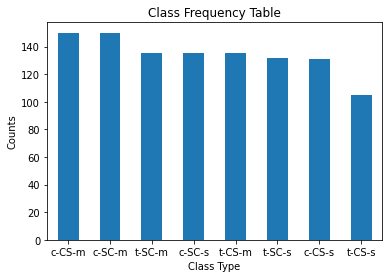

In [ ]:
data["class"].value_counts().plot(kind="bar")
plt.title("Class Frequency Table")
plt.xlabel("Class Type")
plt.xticks(rotation="horizontal")
plt.ylabel("Counts")

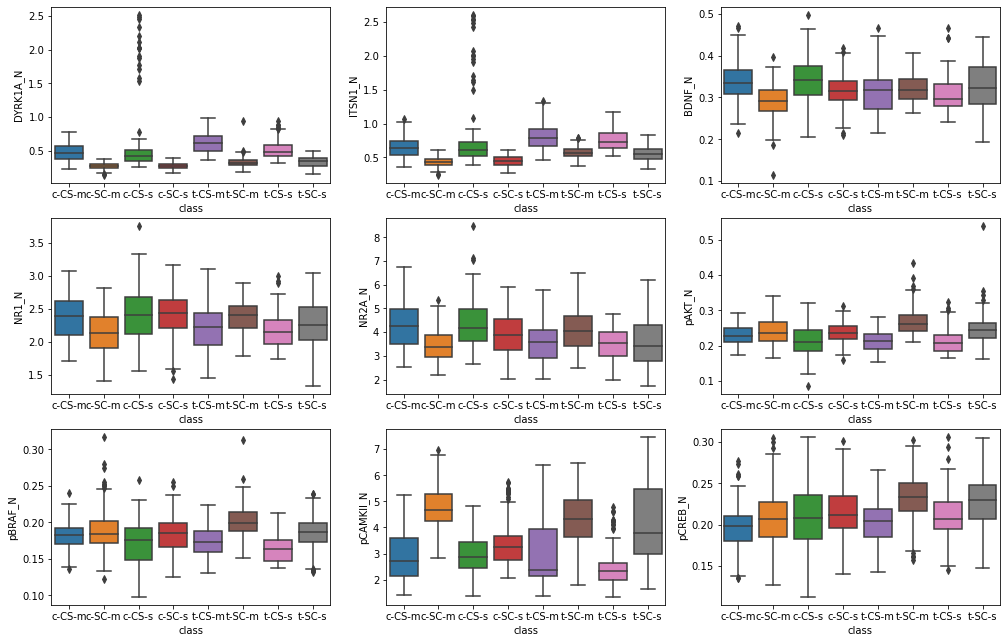

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,11))

for idx, feat in enumerate(data.columns[0:9]):
    sns.boxplot(x="class",y=feat, data=data, ax=axes[int(idx/3), idx %3]) # % - residue
    # int(idx/3) - row # idx %3 - column
# [row,column] - [0,0], [0,1], ..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8448226910>,
      dtype=object)

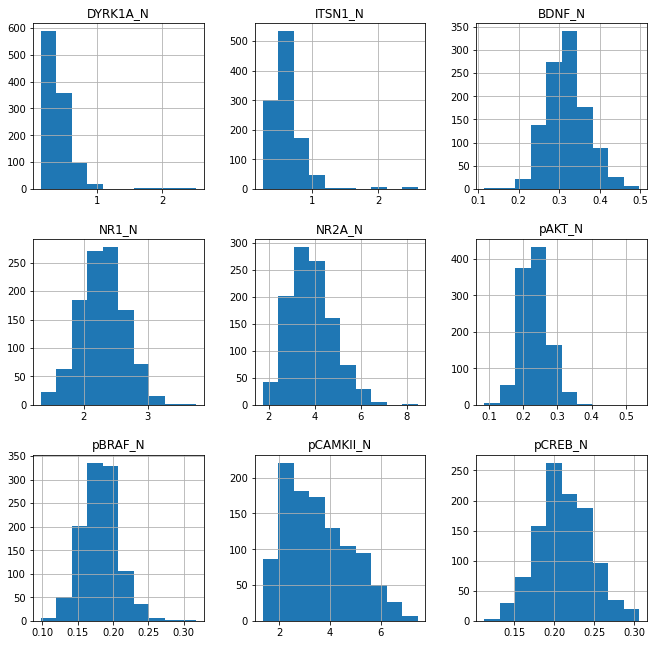

In [ ]:
data[data.columns[:9]].hist(figsize=(11,11))

In [ ]:
# delete outliers out of three-sigma
low = 0.01
high = 0.99
quant_data = data.quantile([low,high]) 
# find values of lim [1% values below for low] and [1% values above for high]
quant_data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
0.01,0.18,0.31,0.21,1.49,2.08,0.15,0.12,1.50,0.14,0.81,0.22,0.19,0.21,0.18,0.55,0.35,0.94,0.73,0.31,0.41,0.16,0.25,0.13,1.31,0.69,0.16,0.18,0.39,0.12,0.27,0.25,0.3,0.26,0.32,0.25,0.25,0.27,0.24,0.23,0.30,0.15,0.13,0.61,0.12,0.65,0.21,0.20,0.63,0.06,0.12,0.13,0.09,0.12,0.12,0.12,0.09,0.15,0.09,0.35,0.23,1.04,1.56,0.11,0.88,0.63,0.18,0.09,0.30,0.71
0.99,1.80,1.76,0.44,3.07,6.21,0.34,0.25,6.62,0.30,3.74,2.45,0.41,0.44,0.39,1.12,1.18,2.17,2.68,0.60,0.98,1.68,0.51,0.26,4.29,2.13,0.31,0.36,0.94,0.25,0.55,1.43,0.6,0.67,1.01,0.87,0.55,0.77,0.53,0.46,0.61,0.90,0.26,1.39,0.22,3.11,0.37,0.74,2.29,1.03,0.26,0.22,0.15,0.19,0.24,0.47,0.16,0.30,0.18,0.73,0.36,2.20,2.79,0.22,1.64,1.05,0.32,0.15,0.59,2.03


In [ ]:
# assume name is a column
for name in list(data.drop(labels=["class"], axis=1).columns): # all column names except for "class"
   data=data[(data[name] > quant_data.loc[low,name]) & (data[name]< quant_data.loc[high,name])]
# choose such values in data[name] located between quant_data[low, name] n quant_data[high, name]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84451e7cd0>,
      dtype=object)

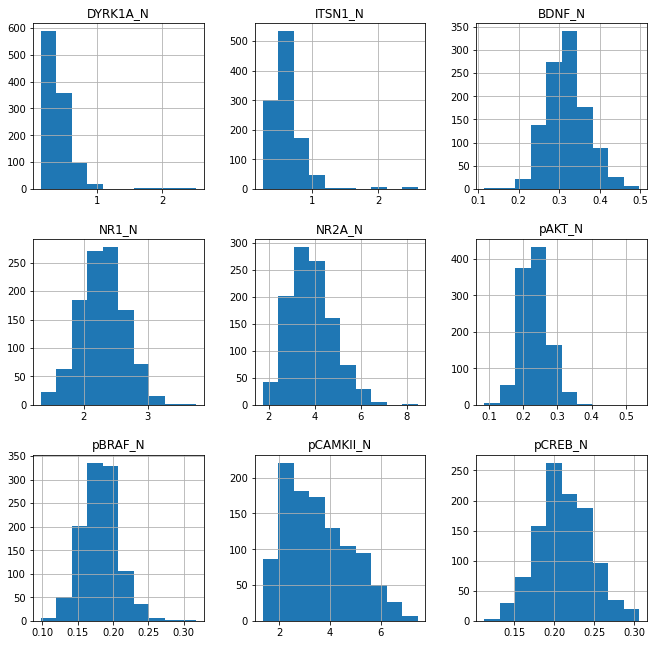

In [ ]:
# now, it is better
data[data.columns[:9]].hist(figsize=(11,11))

In [ ]:
data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,class
4,0.43,0.62,0.36,2.37,4.72,0.21,0.17,2.13,0.19,1.50,0.55,0.29,0.36,0.28,0.86,0.51,1.48,2.01,0.48,0.69,0.37,0.36,0.17,2.90,1.36,0.25,0.27,0.70,0.15,0.40,0.33,0.41,0.31,0.69,0.54,0.36,0.51,0.35,0.31,0.42,0.39,0.16,0.77,0.19,1.65,0.30,0.31,1.21,0.16,0.16,0.19,0.10,0.14,0.17,0.14,0.12,0.26,0.14,0.48,0.25,1.53,2.01,0.12,1.00,0.88,0.21,0.10,0.43,1.84,c-CS-m
36,0.52,0.72,0.36,2.46,5.19,0.23,0.19,2.48,0.19,1.64,0.80,0.33,0.33,0.25,0.88,0.75,1.76,1.59,0.37,0.84,0.47,0.40,0.17,3.45,1.38,0.26,0.28,0.76,0.16,0.39,0.34,0.51,0.41,0.76,0.65,0.44,0.64,0.46,0.36,0.47,0.19,0.21,1.08,0.17,0.78,0.35,0.58,1.64,0.12,0.18,0.20,0.13,0.17,0.19,0.26,0.14,0.20,0.12,0.55,0.30,1.57,2.26,0.14,1.26,0.87,0.22,0.13,0.56,1.73,c-CS-m
42,0.45,0.69,0.36,2.39,4.50,0.28,0.21,2.59,0.22,1.61,0.73,0.35,0.35,0.28,0.87,0.71,1.72,1.62,0.40,0.81,0.46,0.44,0.20,3.15,1.40,0.28,0.30,0.77,0.20,0.38,0.35,0.53,0.43,0.82,0.72,0.43,0.68,0.48,0.38,0.43,0.19,0.19,0.93,0.17,0.79,0.33,0.53,1.38,0.12,0.17,0.19,0.13,0.17,0.19,0.23,0.13,0.18,0.10,0.56,0.31,1.46,2.10,0.16,1.35,0.92,0.22,0.13,0.52,1.62,c-CS-m
55,0.38,0.60,0.34,2.49,4.26,0.25,0.21,2.67,0.20,1.30,0.60,0.33,0.32,0.27,0.89,0.67,1.70,1.36,0.41,0.74,0.39,0.42,0.20,2.96,1.26,0.28,0.28,0.78,0.20,0.40,0.34,0.51,0.40,0.78,0.64,0.38,0.64,0.45,0.35,0.43,0.18,0.19,0.84,0.18,0.91,0.33,0.55,1.64,0.09,0.16,0.18,0.13,0.18,0.17,0.23,0.14,0.21,0.11,0.55,0.32,1.45,2.38,0.16,1.44,0.96,0.26,0.13,0.51,1.72,c-CS-m
58,0.37,0.57,0.33,2.44,4.04,0.27,0.22,2.63,0.21,1.32,0.62,0.35,0.32,0.29,0.89,0.62,1.62,1.34,0.43,0.73,0.39,0.47,0.21,2.78,1.30,0.29,0.29,0.77,0.20,0.36,0.34,0.49,0.39,0.80,0.65,0.37,0.68,0.46,0.35,0.42,0.18,0.18,0.83,0.17,0.91,0.33,0.53,1.38,0.08,0.18,0.16,0.13,0.17,0.17,0.20,0.13,0.19,0.09,0.64,0.33,1.59,2.37,0.18,1.47,0.94,0.26,0.13,0.55,1.63,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0.27,0.48,0.33,2.22,3.27,0.24,0.18,3.55,0.25,1.04,0.25,0.31,0.30,0.27,0.79,0.61,1.34,1.50,0.46,0.65,0.25,0.36,0.17,2.23,1.16,0.25,0.27,0.77,0.19,0.41,0.88,0.44,0.37,0.71,0.58,0.33,0.54,0.31,0.30,0.40,0.67,0.19,0.75,0.15,2.70,0.29,0.58,0.82,0.58,0.15,0.17,0.11,0.15,0.18,0.33,0.12,0.19,0.11,0.50,0.29,1.33,2.19,0.14,1.25,0.76,0.21,0.11,0.32,1.33,t-SC-s
1069,0.33,0.57,0.33,2.55,3.81,0.23,0.18,3.30,0.23,1.19,0.33,0.31,0.29,0.27,0.89,0.66,1.52,1.42,0.45,0.71,0.26,0.36,0.19,2.52,1.18,0.27,0.30,0.79,0.17,0.46,1.11,0.43,0.38,0.69,0.55,0.32,0.58,0.31,0.27,0.41,0.56,0.23,0.99,0.15,2.41,0.31,0.69,0.88,0.58,0.18,0.19,0.12,0.16,0.20,0.40,0.12,0.21,0.14,0.55,0.35,1.44,2.16,0.15,1.19,0.91,0.24,0.12,0.40,1.39,t-SC-s
1071,0.32,0.51,0.29,2.31,3.04,0.23,0.18,2.88,0.21,1.09,0.31,0.30,0.28,0.28,0.85,0.57,1.37,1.27,0.43,0.65,0.26,0.34,0.18,2.22,1.07,0.24,0.28,0.73,0.17,0.39,0.97,0.40,0.33,0.65,0.52,0.30,0.56,0.29,0.25,0.37,0.56,0.22,0.91,0.16,2.50,0.32,0.66,0.80,0.55,0.18,0.18,0.13,0.16,0.20,0.40,0.13,0.22,0.14,0.56,0.34,1.41,2.48,0.16,1.20,0.88,0.24,0.13,0.41,1.34,t-SC-s
1072,0.33,0.51,0.32,2.32,3.45,0.24,0.20,2.96,0.22,1.12,0.31,0.30,0.27,0.30,0.86,0.59,1.38,1.35,0.43,0.65,0.28,0.39,0.19,2.24,1.12,0.27,0.28,0.76,0.17,0.40,0.99,0.41,0.34,0.67,0.53,0.31,0.55,0.31,0.27,0.38,0.57,0.21,0.87,0.15,2.36,0.31,0.62,0.75,0.54,0.17,0.18,0.12,0.16,0.19,0.38,0.12,0.21,0.13,0.53,0.34,1.30,2.38,0.15,1.17,0.86,0.25,0.12,

In [ ]:
data.shape

(241, 70)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(labels=["class"], axis=1)
Y = data["class"]

In [ ]:
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
4,0.43,0.62,0.36,2.37,4.72,0.21,0.17,2.13,0.19,1.50,0.55,0.29,0.36,0.28,0.86,0.51,1.48,2.01,0.48,0.69,0.37,0.36,0.17,2.90,1.36,0.25,0.27,0.70,0.15,0.40,0.33,0.41,0.31,0.69,0.54,0.36,0.51,0.35,0.31,0.42,0.39,0.16,0.77,0.19,1.65,0.30,0.31,1.21,0.16,0.16,0.19,0.10,0.14,0.17,0.14,0.12,0.26,0.14,0.48,0.25,1.53,2.01,0.12,1.00,0.88,0.21,0.10,0.43,1.84
5,0.45,0.63,0.37,2.39,4.81,0.22,0.18,2.14,0.20,1.44,0.57,0.29,0.36,0.27,0.86,0.52,1.54,1.97,0.50,0.67,0.37,0.36,0.18,2.96,1.45,0.25,0.28,0.70,0.16,0.39,0.33,0.40,0.30,0.67,0.54,0.35,0.51,0.35,0.30,0.41,0.38,0.16,0.78,0.19,1.63,0.29,0.33,1.12,0.18,0.15,0.18,0.11,0.14,0.17,0.13,0.12,0.24,0.14,0.48,0.24,1.51,2.00,0.12,0.92,0.84,0.19,0.11,0.44,1.82
10,0.37,0.51,0.33,2.07,3.66,0.23,0.19,1.72,0.19,1.32,0.46,0.29,0.38,0.27,0.77,0.45,1.30,1.76,0.51,0.55,0.35,0.36,0.20,2.17,1.23,0.27,0.26,0.64,0.17,0.42,0.35,0.43,0.35,0.69,0.55,0.34,0.52,0.34,0.32,0.41,0.51,0.14,0.66,0.17,1.90,0.30,0.28,0.90,0.14,0.17,0.18,0.09,0.13,0.15,0.13,0.12,0.24,0.13,0.43,0.25,1.33,1.86,0.13,0.94,0.84,0.19,0.09,0.39,1.61
11,0.36,0.50,0.36,2.01,3.47,0.22,0.20,1.67,0.19,1.17,0.45,0.28,0.36,0.26,0.74,0.44,1.25,1.69,0.49,0.55,0.32,0.34,0.20,2.11,1.21,0.24,0.28,0.62,0.16,0.37,0.33,0.41,0.33,0.67,0.53,0.33,0.51,0.33,0.32,0.38,0.50,0.14,0.68,0.18,2.00,0.31,0.29,0.97,0.16,0.16,0.17,0.10,0.14,0.16,0.13,0.12,0.24,0.14,0.46,0.25,1.30,1.91,0.12,0.91,0.84,0.19,0.10,0.44,1.72
15,0.74,0.86,0.38,2.74,6.07,0.22,0.19,2.28,0.19,2.38,1.08,0.36,0.38,0.30,0.96,0.79,1.90,1.71,0.39,0.86,0.54,0.39,0.18,4.11,1.46,0.27,0.29,0.79,0.17,0.42,0.39,0.52,0.37,0.87,0.80,0.54,0.65,0.52,0.41,0.55,0.23,0.20,0.91,0.19,0.94,0.29,0.29,1.35,0.12,0.23,0.19,0.14,0.13,0.16,0.18,0.14,0.23,0.13,0.36,0.23,1.13,1.68,0.14,1.18,0.67,0.18,0.14,0.44,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.33,0.51,0.32,2.32,3.45,0.24,0.20,2.96,0.22,1.12,0.31,0.30,0.27,0.30,0.86,0.59,1.38,1.35,0.43,0.65,0.28,0.39,0.19,2.24,1.12,0.27,0.28,0.76,0.17,0.40,0.99,0.41,0.34,0.67,0.53,0.31,0.55,0.31,0.27,0.38,0.57,0.21,0.87,0.15,2.36,0.31,0.62,0.75,0.54,0.17,0.18,0.12,0.16,0.19,0.38,0.12,0.21,0.13,0.53,0.34,1.30,2.38,0.15,1.17,0.86,0.25,0.12,0.40,1.30
1073,0.28,0.53,0.30,2.29,3.24,0.25,0.20,2.95,0.22,1.14,0.30,0.30,0.28,0.26,0.83,0.57,1.38,1.32,0.43,0.65,0.27,0.35,0.17,2.24,1.08,0.24,0.27,0.72,0.17,0.40,0.97,0.41,0.35,0.67,0.53,0.30,0.54,0.29,0.27,0.39,0.54,0.21,0.91,0.15,2.48,0.29,0.60,0.87,0.53,0.18,0.18,0.12,0.16,0.20,0.38,0.13,0.19,0.13,0.52,0.34,1.30,2.24,0.16,1.24,0.87,0.25,0.12,0.41,1.30
1075,0.25,0.46,0.25,2.09,2.60,0.21,0.17,2.48,0.21,1.06,0.27,0.29,0.25,0.26,0.75,0.51,1.22,1.24,0.42,0.64,0.26,0.33,0.19,1.82,0.99,0.24,0.25,0.64,0.17,0.37,0.82,0.38,0.32,0.60,0.51,0.27,0.44,0.26,0.24,0.34,0.53,0.21,0.79,0.18,2.63,0.32,0.65,0.74,0.53,0.20,0.18,0.12,0.16,0.19,0.41,0.13,0.21,0.13,0.50,0.33,1.32,2.58,0.17,1.26,0.96,0.28,0.12,0.37,1.36
1076,0.27,0.47,0.25,2.16,2.80,0.25,0.18,2.51,0.22,1.08,0.27,0.29,0.25,0.25,0.75,0.52,1.22,1.36,0.42,0.65,0.25,0.34,0.18,1.88,0.97,0.25,0.26,0.69,0.19,0.36,0.85,0.38,0.34,0.61,0.52,0.27,0.58,0.28,0.24,0.35,0.52,0.19,0.76,0.17,2.59,0.32,0.63,0.76,0.55,0.19,0.17,0.11,0.16,0.19,0.40,0.13,0.21,0.12,0.51,0.34,1.28,2.53,0.17,1.25,0.98,0.28,0.11,0.38,1.36


In [ ]:
Y

4       c-CS-m
36      c-CS-m
42      c-CS-m
55      c-CS-m
58      c-CS-m
         ...  
1055    t-SC-s
1069    t-SC-s
1071    t-SC-s
1072    t-SC-s
1073    t-SC-s
Name: class, Length: 241, dtype: object

In [ ]:
X.loc[:,"DYRK1A_N"]

4       0.43
5       0.45
10      0.37
11      0.36
15      0.74
        ... 
1072    0.33
1073    0.28
1075    0.25
1076    0.27
1079    0.30
Name: DYRK1A_N, Length: 570, dtype: float64

In [ ]:
# A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. 
# Normality is an important assumption for many statistical techniques.

In [ ]:
DYRK1A_N, fit_boxcox = stats.boxcox(X.loc[:,"DYRK1A_N"]) 
fit_boxcox
# transformation: to make our data better (more normally distributed) 

-0.8429049546991306

In [ ]:
DYRK1A_N_transformed = stats.boxcox(X.loc[:,"DYRK1A_N"], fit_boxcox) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


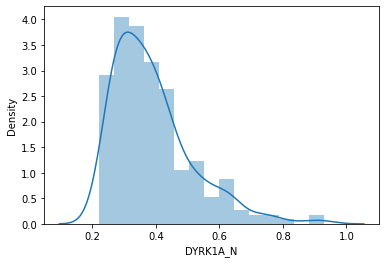

In [ ]:
sns.distplot(X["DYRK1A_N"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


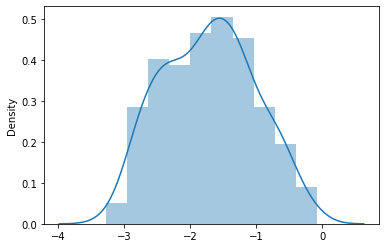

In [ ]:
sns.distplot(DYRK1A_N_transformed) # better
# not tange teezered just scaled like log plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


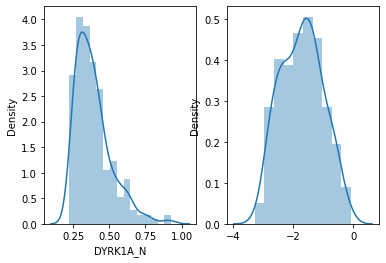

In [ ]:
fig, ax = plt.subplots(1,2)
sns.distplot(X["DYRK1A_N"], ax=ax[0])
sns.distplot(DYRK1A_N_transformed, ax=ax[1])

### Try another gene 

In [ ]:
# make transformation for all features
for name in list(X.columns):
   X.loc[:,name] = stats.boxcox(X.loc[:,name], fit_boxcox)
  # X.loc[:,name], fit_boxcox = stats.boxcox(X.loc[:,name]) another way to write the same command

In [ ]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# StandardScaler is needed for data transformation in such a way that a distribution would have mean = 0 and sd = 1.
# Aim of this method: normalize/standardize data, it means - μ = 0 n σ = 1. - our features/variables/columns from X df. - before use of any ML model.
# StandardScaler() normalizes functionS: each column from X df individually; so, each column/feature/variable would have μ = 0 n σ = 1.
X_scaled = scaler.fit_transform(X) # to create a transformed version of our dataset
X_scaled

array([[ 0.51081825,  0.34176268,  1.03963809, ..., -1.44605503,
        -0.15915475,  1.29949844],
       [ 0.58720227,  0.40583673,  1.21087379, ..., -1.27333484,
        -0.06466285,  1.25869606],
       [ 0.01102265, -0.40599945,  0.35272158, ..., -2.63530615,
        -1.07466738,  0.85862857],
       ...,
       [-1.32179858, -0.87066055, -1.85996153, ..., -0.40514344,
        -1.3190083 ,  0.22035513],
       [-1.04913957, -0.76429208, -1.98480675, ..., -0.59724816,
        -1.29312647,  0.21932183],
       [-0.64070596, -0.89680521, -1.79512353, ..., -0.14512943,
        -0.3986648 ,  0.2387778 ]])

In [ ]:
X.index

Int64Index([   4,    5,   10,   11,   15,   16,   18,   19,   20,   21,
            ...
            1067, 1068, 1069, 1070, 1071, 1072, 1073, 1075, 1076, 1079],
           dtype='int64', length=570)

In [ ]:
X.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N',
       'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N',
       'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N',
       'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N',
       'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N',
       'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N',
       'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N',
       'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N', 'CaNA_N'],
      dtype='object')

In [ ]:
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
4,5.11e-01,0.34,1.04,0.29,1.06,-5.80e-01,-0.31,-1.57,-0.67,0.62,0.53,-0.61,1.01,1.86e-01,0.48,-1.45,-0.30,1.12,0.69,0.16,0.39,-0.03,-0.10,0.82,0.93,0.39,0.10,0.12,-0.48,0.01,-0.86,-0.76,-1.47,-0.61,-0.52,0.07,-0.79,0.10,0.13,0.23,0.29,-0.86,-1.26,1.43,0.14,0.18,-0.94,0.17,0.16,0.09,0.53,-1.45,-1.28,-0.61,-1.83,-0.22,1.00,0.82,-0.55,-1.58,0.03,-1.12e+00,-2.12,-1.85,0.37,-0.73,-1.45,-0.16,1.30e+00
5,5.87e-01,0.41,1.21,0.36,1.13,-3.79e-01,-0.17,-1.55,-0.54,0.41,0.59,-0.54,1.01,-1.22e-01,0.42,-1.31,-0.02,1.06,0.87,0.01,0.40,0.02,0.14,0.90,1.25,0.40,0.40,0.14,-0.37,-0.13,-0.87,-0.86,-1.86,-0.83,-0.47,-0.07,-0.76,0.02,-0.09,0.11,0.23,-0.75,-1.15,1.48,0.12,-0.12,-0.65,-0.12,0.26,-0.51,0.26,-1.27,-1.52,-0.28,-2.11,-0.30,0.52,0.64,-0.59,-1.94,-0.10,-1.15e+00,-2.02,-2.67,-0.01,-1.51,-1.27,-0.06,1.26e+00
10,1.10e-02,-0.41,0.35,-0.83,-0.14,-4.12e-03,0.63,-2.58,-0.99,-0.04,0.09,-0.53,1.27,2.32e-03,-0.60,-2.13,-1.34,0.72,1.06,-1.50,0.20,0.15,0.85,-0.50,0.39,0.92,-0.24,-0.59,0.23,0.38,-0.70,-0.35,-0.72,-0.60,-0.36,-0.31,-0.59,-0.10,0.39,-0.01,0.81,-1.76,-2.45,0.84,0.48,0.23,-1.44,-1.14,-0.07,0.58,0.26,-2.64,-2.79,-1.59,-2.33,0.13,0.48,0.53,-1.49,-1.63,-1.13,-1.97e+00,-1.57,-2.44,-0.03,-1.49,-2.64,-1.07,8.59e-01
11,-9.26e-03,-0.53,0.96,-1.12,-0.43,-4.60e-01,1.06,-2.74,-0.76,-0.73,0.01,-0.88,0.97,-1.92e-01,-0.88,-2.21,-1.66,0.59,0.82,-1.47,-0.03,-0.31,0.91,-0.65,0.27,0.12,0.33,-0.82,-0.19,-0.61,-0.81,-0.76,-1.04,-0.93,-0.64,-0.74,-0.93,-0.31,0.29,-0.46,0.77,-1.90,-2.29,1.18,0.59,0.50,-1.25,-0.78,0.10,-0.20,-0.36,-2.14,-1.95,-0.97,-2.23,-0.28,0.50,0.83,-1.00,-1.68,-1.28,-1.65e+00,-1.76,-2.77,-0.10,-1.27,-2.14,-0.02,1.09e+00
15,1.68e+00,1.43,1.41,1.39,2.01,-3.62e-01,0.26,-1.29,-0.57,2.43,1.69,0.88,1.34,7.21e-01,1.29,0.51,1.39,0.63,-1.07,1.49,1.39,0.69,-0.06,2.04,1.31,1.11,0.50,0.88,0.18,0.43,-0.39,1.17,-0.36,1.14,2.34,2.70,1.27,2.32,1.87,2.07,-1.25,0.87,-0.08,1.68,-1.65,-0.21,-1.15,0.58,-0.52,2.76,0.76,1.26,-2.64,-1.13,-0.34,1.55,0.43,0.46,-3.29,-2.53,-2.60,-3.17e+00,-0.85,-0.34,-2.36,-2.22,1.26,-0.06,8.17e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,-2.98e-01,-0.40,0.07,0.12,-0.45,2.04e-01,0.94,-0.34,0.26,-0.98,-1.12,-0.19,-1.13,7.38e-01,0.41,-0.73,-0.84,-0.20,-0.23,-0.19,-0.58,0.67,0.70,-0.33,-0.17,0.94,0.33,0.66,0.35,0.12,1.34,-0.84,-0.86,-0.89,-0.57,-1.17,-0.14,-0.76,-1.12,-0.58,0.99,1.19,-0.36,-0.34,0.92,0.72,1.21,-2.08,1.42,0.77,-0.18,-0.24,0.26,0.47,2.17,0.57,-0.48,0.33,0.12,1.60,-1.27,5.88e-01,0.02,-0.41,0.18,1.11,-0.24,-0.87,7.18e-03
1073,-9.23e-01,-0.28,-0.38,0.03,-0.81,5.06e-01,0.72,-0.35,0.48,-0.86,-1.27,-0.33,-0.76,-2.02e-01,0.12,-0.84,-0.85,-0.30,-0.28,-0.24,-0.68,-0.08,-0.61,-0.33,-0.42,0.03,0.10,0.24,0.28,0.08,1.31,-0.74,-0.73,-0.94,-0.71,-1.39,-0.36,-1.28,-0.93,-0.40,0.90,1.06,-0.04,-0.24,1.00,0.08,1.15,-1.28,1.40,0.93,-0.25,0.11,0.07,0.66,2.17,0.98,-1.10,0.56,0.10,1.55,-1.32,1.04e-04,0.27,0.06,0.30,1.08,0.11,-0.62,8.49e-03
1075,-1.32e+00,-0.87,-1.86,-0.74,-2.21,-6.32e-01,-0.43,-0.95,-0.04,-1.33,-1.75,-0.43,-1.80,-2.87e-01,-0.84,-1.42,-1.87,-0.55,-0.33,-0.35,-0.92,-0.69,0.60,-1.47,-0.96,-0.16,-0.71,-0.52,0.05,-0.52,1.09,-1.44,-1.32,-1.88,-1.00,-2.45,-2.40,-2.14,-2.05,-1.53,0.86,1.14,-1.07,1.08,1.11,0.86,1.33,-2.22,1.40,1.76,0.20,-0.41,0.36,0.34,2.35,1.40,-0.40,0.55,-0.20,1.2

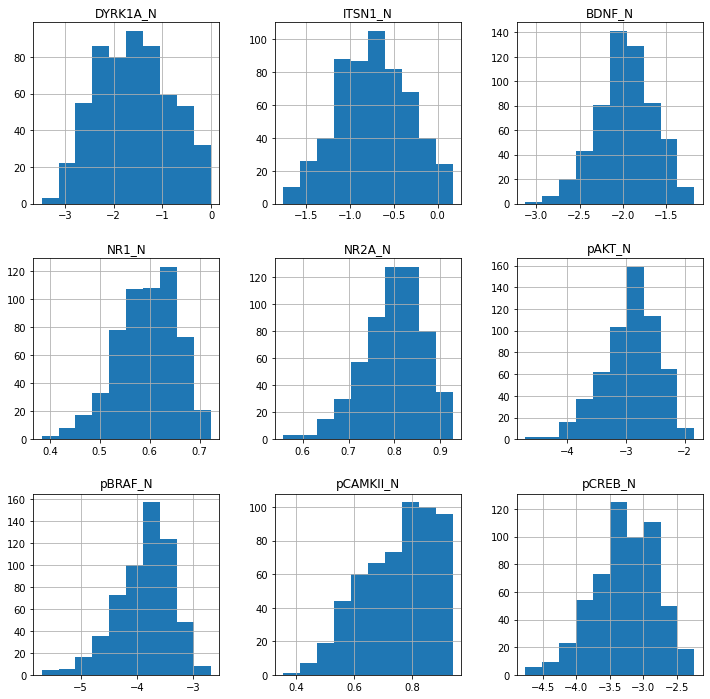

In [ ]:
# plot
X[X.columns[:9]].hist(figsize=(12,12));

In [ ]:
# PCA (principal component analysis)
from sklearn.decomposition import PCA

pca = PCA(n_components = 10) # number of components
pca.fit(X)  
X_pca = pca.transform(X)
X_pca
# PCA - one of the main methods to decrease the data scale with minimal loss of information. It was invented by Karl Pearson in 1901.
# ~ suppose you have a data set with 100 rows and each row has 500 columns. 
# if you construct a PCA like PCA(n_components = 10) 
# and then call fit you find that components_ have 10 rows (one for each of the components you request) and 500 columns.
# if you then called transform, all 100 rows of your data would be projected into this 10-dimensional space
# so output would have 100 rows (1 for each in the input) but only 10 columns thus reducing the dimension of your data.

array([[ 1.2250194 , -4.58255643,  1.59626867, ..., -1.7259388 ,
        -0.23624001,  2.13225368],
       [ 1.25293084, -4.92445904,  1.73207506, ..., -1.85483295,
        -0.22237835,  2.03266601],
       [ 3.50274393, -3.46831021,  6.03962217, ..., -1.918714  ,
        -0.45624277,  3.34462841],
       ...,
       [ 6.05635542,  1.359425  , -1.04986996, ...,  0.90086884,
        -2.04837166,  2.15005472],
       [ 4.69859947,  1.57166942, -0.25679297, ...,  1.9146762 ,
        -2.92390655,  1.88103338],
       [ 2.88504182,  2.0098829 ,  0.0517122 , ...,  2.75428122,
        -2.20122222,  2.01737906]])

In [ ]:
pca.n_components_

10

In [ ]:
pca.explained_variance_
# explained variance (also called explained variation) is used to measure the discrepancy between a model and actual data. 
# higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions (Rosenthal & Rosenthal, 2011).

array([16.39121888, 12.86637688,  6.78850908,  5.80934467,  3.94740511,
        3.54749558,  2.52037963,  2.24253502,  1.79702224,  1.62817808])

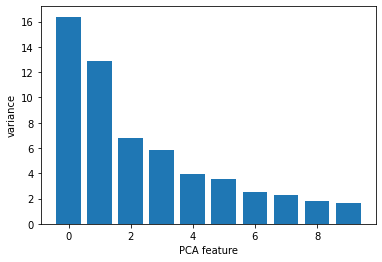

In [ ]:
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.show()

In [ ]:
pca.explained_variance_ratio_
# "explained_variance_ratio_" - This is an array of the variance of the data explained by each of the 10 principal components, starting with PC1, the principal component that explains most of the variance.
# if we sum up the values in this array they will equal 0.832, indicating that the 10 principal components together explain 83.2% of the variance of the data.

array([0.23713714, 0.18614209, 0.09821159, 0.08404569, 0.0571084 ,
       0.05132278, 0.03646316, 0.03244349, 0.02599811, 0.02355539])

In [ ]:
# more usefully we can express the explained variance ratio as a cumulative sum:
pca.explained_variance_ratio_.cumsum()
# this now more clearly shows the amount of variance explained as we add principal components: PC1 explains 23.7%, PC1 and PC2 explain 42.3%, PC1, PC2 and PC3 explain 52.1%, etc all the way up to 83.2% explained by all 10 principal components.

array([0.23713714, 0.42327923, 0.52149081, 0.60553651, 0.66264491,
       0.71396769, 0.75043085, 0.78287434, 0.80887245, 0.83242783])

In [ ]:
set(Y)

{'c-CS-m',
 'c-CS-s',
 'c-SC-m',
 'c-SC-s',
 't-CS-m',
 't-CS-s',
 't-SC-m',
 't-SC-s'}

In [ ]:
X_pca

array([[ 1.22501939, -4.58255643,  1.59626865, ..., -1.72580189,
        -0.23633499,  2.1320693 ],
       [ 1.25293084, -4.92445903,  1.73207504, ..., -1.8546709 ,
        -0.22250764,  2.03249926],
       [ 3.50274393, -3.46831022,  6.03962217, ..., -1.91866137,
        -0.45624262,  3.3445263 ],
       ...,
       [ 6.05635542,  1.35942501, -1.04986985, ...,  0.90080441,
        -2.04839343,  2.15003483],
       [ 4.69859947,  1.57166942, -0.25679298, ...,  1.91459344,
        -2.92389462,  1.88085692],
       [ 2.88504181,  2.0098829 ,  0.05171221, ...,  2.7542432 ,
        -2.20122018,  2.01729403]])

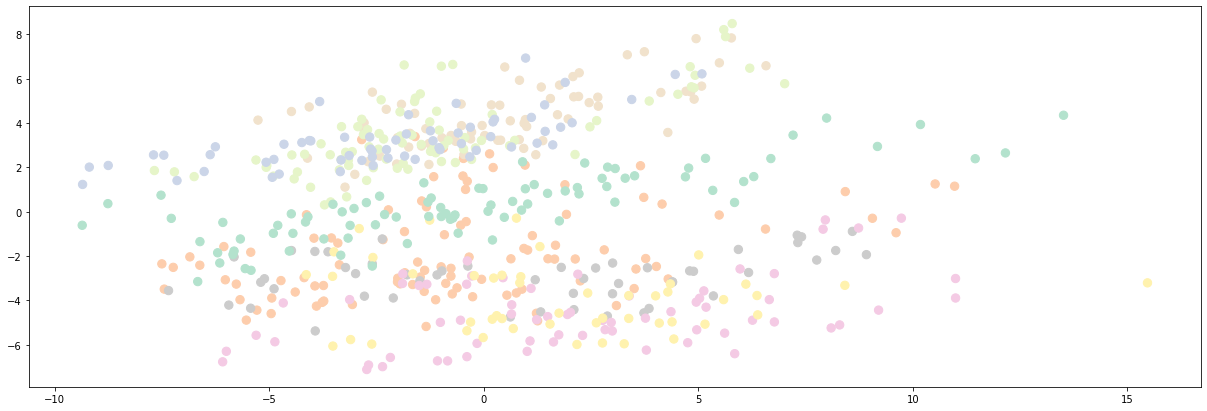

In [ ]:
# convert Y in the numeric type (in values)
d = dict(zip(set(Y), range(1, 9))) # range(1, 9) [1,..,8] <- 8 classes
label = list()
for i in Y:
    label.append(d[i])

# and create the plot for two components
plt.figure(figsize=(21,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = label, s = 70, cmap = "Pastel2_r") # X_pca[:, 0], X_pca[:, 1] - the 1st and 2nd components
# c = label (color depends on label list) / s = 70 - size of dots on the plot / cmap = "viridis" - to make warning to see many variances of colors
plt.show()

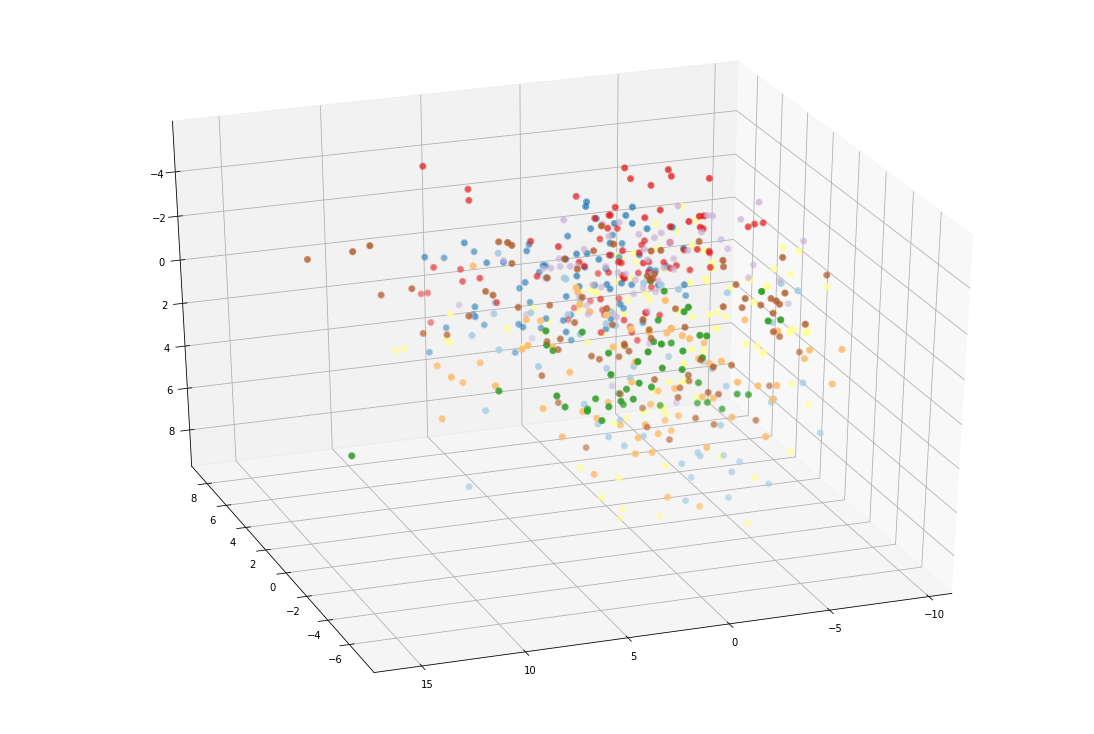

In [115]:
from mpl_toolkits.mplot3d import Axes3D
#plt.clf() # clear a figure with all its axes (but leaves a window opened such that it may be reused for other plots)
fig = plt.figure(1, figsize=(15,10)) # "1" - index for a figure
ax = Axes3D(fig, elev = -150, azim = 110, ) # elev means elevation from which to view my plot. / azim - azimuth angle to vary the full 360deg around my plot.
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = label, cmap = plt.cm.Paired, linewidths = 2.7) # cmap = plt.cm.Paired same as cmap = "Paired" / linewidths = 2.7 - size of dots

In [104]:
import matplotlib.pyplot as plt
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r